In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#Create set of random coordinates
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add the coordinates to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
#Create list for citites
cities = []

#Identify nearest city for coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique, add to list of cities
    if city not in cities: 
        cities.append(city)

#Print length of city list
len(cities)

604

In [7]:
#Import datetime
from datetime import datetime

#Create empty list for weather data
city_data = []

#Print beginning of log
print("Beginning data retrieval")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through cities in list 
for i, city in enumerate(cities):
    #Group cities in sets of 50
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log URL, record, set num, city
    print(f"Processing record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    
    #Run API req for each city
    try:
    #Parse JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #Convert date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        #Append city info to city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #Skip errors
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate Data Loading complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval
-----------------------------
Processing record 1 of set 1 | longyearbyen
Processing record 2 of set 1 | ushuaia
Processing record 3 of set 1 | arraial do cabo
Processing record 4 of set 1 | ksenyevka
City not found. Skipping...
Processing record 5 of set 1 | burica
City not found. Skipping...
Processing record 6 of set 1 | hermanus
Processing record 7 of set 1 | kaitangata
Processing record 8 of set 1 | rikitea
Processing record 9 of set 1 | zephyrhills
Processing record 10 of set 1 | kamina
Processing record 11 of set 1 | nanortalik
Processing record 12 of set 1 | nantucket
Processing record 13 of set 1 | mataura
Processing record 14 of set 1 | punta arenas
Processing record 15 of set 1 | albany
Processing record 16 of set 1 | seydi
Processing record 17 of set 1 | cape town
Processing record 18 of set 1 | le port
Processing record 19 of set 1 | tuktoyaktuk
Processing record 20 of set 1 | verkhoyansk
Processing record 21 of set 1 | hassleholm
Processing record

Processing record 34 of set 4 | ballina
Processing record 35 of set 4 | grand river south east
City not found. Skipping...
Processing record 36 of set 4 | mbandaka
Processing record 37 of set 4 | pisco
Processing record 38 of set 4 | kijang
Processing record 39 of set 4 | enid
Processing record 40 of set 4 | marcona
City not found. Skipping...
Processing record 41 of set 4 | ketchikan
Processing record 42 of set 4 | husavik
Processing record 43 of set 4 | blythe
Processing record 44 of set 4 | cabo san lucas
Processing record 45 of set 4 | lorengau
Processing record 46 of set 4 | yasothon
Processing record 47 of set 4 | jining
Processing record 48 of set 4 | dickinson
Processing record 49 of set 4 | anori
Processing record 50 of set 4 | waipawa
Processing record 1 of set 5 | tateyama
Processing record 2 of set 5 | omboue
Processing record 3 of set 5 | sambava
Processing record 4 of set 5 | gambela
Processing record 5 of set 5 | gravelbourg
Processing record 6 of set 5 | plettenberg bay

City not found. Skipping...
Processing record 25 of set 8 | tiksi
Processing record 26 of set 8 | saint-augustin
Processing record 27 of set 8 | bismarck
Processing record 28 of set 8 | mpongwe
Processing record 29 of set 8 | dingle
Processing record 30 of set 8 | siocon
Processing record 31 of set 8 | anito
Processing record 32 of set 8 | amga
Processing record 33 of set 8 | vila velha
Processing record 34 of set 8 | oytal
Processing record 35 of set 8 | pangody
Processing record 36 of set 8 | alice springs
Processing record 37 of set 8 | banepa
Processing record 38 of set 8 | oktyabrskiy
Processing record 39 of set 8 | gurskoye
City not found. Skipping...
Processing record 40 of set 8 | koungou
Processing record 41 of set 8 | cidreira
Processing record 42 of set 8 | vieques
Processing record 43 of set 8 | esperance
Processing record 44 of set 8 | yandoon
City not found. Skipping...
Processing record 45 of set 8 | kirakira
Processing record 46 of set 8 | yaan
Processing record 47 of s

Processing record 9 of set 12 | mugan
Processing record 10 of set 12 | havelock
Processing record 11 of set 12 | hay river
Processing record 12 of set 12 | catamarca
Processing record 13 of set 12 | port arthur
Processing record 14 of set 12 | seydisehir
Processing record 15 of set 12 | palora
Processing record 16 of set 12 | hamza
Processing record 17 of set 12 | olafsvik
Processing record 18 of set 12 | waitati
Processing record 19 of set 12 | amboise
Processing record 20 of set 12 | taltal
Processing record 21 of set 12 | bom jardim
Processing record 22 of set 12 | yenangyaung
Processing record 23 of set 12 | stromness
Processing record 24 of set 12 | tutoia
Processing record 25 of set 12 | tumannyy
City not found. Skipping...
Processing record 26 of set 12 | alegrete
Processing record 27 of set 12 | darhan
Processing record 28 of set 12 | den helder
Processing record 29 of set 12 | coquimbo
Processing record 30 of set 12 | kabelvag
Processing record 31 of set 12 | zhigansk
Processi

In [8]:
len(city_data)

547

In [9]:
#Convert l-d to pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,30.04,64,40,9.22,SJ,2021-05-28 14:24:14
1,Ushuaia,-54.8000,-68.3000,31.66,93,75,20.71,AR,2021-05-28 14:24:14
2,Arraial Do Cabo,-22.9661,-42.0278,84.16,69,0,11.50,BR,2021-05-28 14:24:06
3,Hermanus,-34.4187,19.2345,67.80,80,34,21.50,ZA,2021-05-28 14:24:15
4,Kaitangata,-46.2817,169.8464,43.99,92,100,3.58,NZ,2021-05-28 14:24:15
5,Rikitea,-23.1203,-134.9692,72.64,67,40,12.41,PF,2021-05-28 14:24:16
6,Zephyrhills,28.2336,-82.1812,86.72,64,1,3.18,US,2021-05-28 14:24:16
7,Kamina,-8.7386,24.9906,82.83,25,15,4.05,CD,2021-05-28 14:20:21
8,Nanortalik,60.1432,-45.2371,40.55,75,14,6.93,GL,2021-05-28 14:24:17
9,Nantucket,41.2835,-70.0995,59.07,77,96,19.26,US,2021-05-28 14:20:37


In [10]:
#Reorder cols
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2021-05-28 14:24:14,78.2186,15.6401,30.04,64,40,9.22
1,Ushuaia,AR,2021-05-28 14:24:14,-54.8000,-68.3000,31.66,93,75,20.71
2,Arraial Do Cabo,BR,2021-05-28 14:24:06,-22.9661,-42.0278,84.16,69,0,11.50
3,Hermanus,ZA,2021-05-28 14:24:15,-34.4187,19.2345,67.80,80,34,21.50
4,Kaitangata,NZ,2021-05-28 14:24:15,-46.2817,169.8464,43.99,92,100,3.58
5,Rikitea,PF,2021-05-28 14:24:16,-23.1203,-134.9692,72.64,67,40,12.41
6,Zephyrhills,US,2021-05-28 14:24:16,28.2336,-82.1812,86.72,64,1,3.18
7,Kamina,CD,2021-05-28 14:20:21,-8.7386,24.9906,82.83,25,15,4.05
8,Nanortalik,GL,2021-05-28 14:24:17,60.1432,-45.2371,40.55,75,14,6.93
9,Nantucket,US,2021-05-28 14:20:37,41.2835,-70.0995,59.07,77,96,19.26


In [11]:
#Create output file path
output_path = "weather_data/cities.csv"

#Export city_data
city_data_df.to_csv(output_path, index_label = "City_ID")

In [12]:
# Extract relevant fields for plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

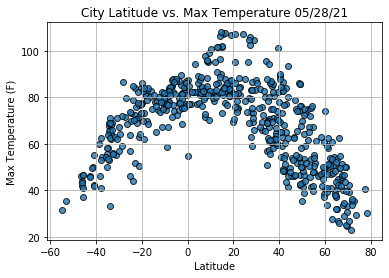

In [13]:
#Import time lib and get today's date
import time
today = time.strftime("%x")

#Build scatter for lat v. temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig1.png")

plt.show()

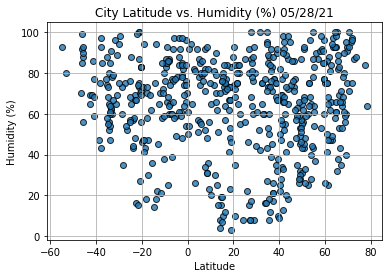

In [14]:
#Build scatter for lat v. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Humidity (%) {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig2.png")

plt.show()

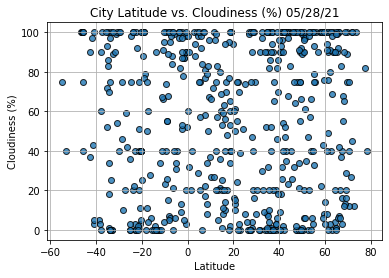

In [15]:
#Build scatter for lat v. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Cloudiness (%) {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig3.png")

plt.show()

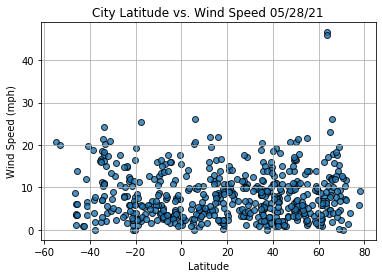

In [16]:
#Build scatter for lat v. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig4.png")

plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

#Create function for lin regression on weather data and plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regress on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calc regression line "y values"
    regress_values = x_values * slope + intercept
    #Get equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #Scatter
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Format plot
    plt.title(title)
    plt.annotate(line_eq + "\nr = " + str(round(r_value, 3)), text_coordinates, fontsize = 15, color = "r")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    

In [18]:
#Divide df into northern and southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

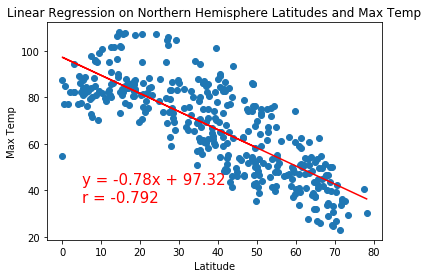

In [25]:
#Linear regression on northern hemi
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on Northern Hemisphere Latitudes and Max Temp", 
                       "Max Temp", (5, 35))

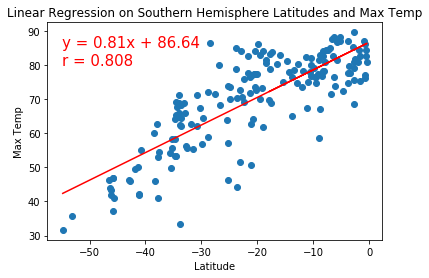

In [24]:
#Linear regression on southern hemi
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression on Southern Hemisphere Latitudes and Max Temp", 
                       "Max Temp", (-55, 80))

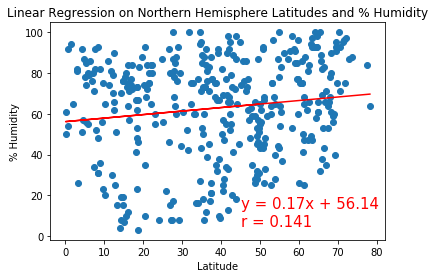

In [28]:
#Linear regress on north hemi humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression on Northern Hemisphere Latitudes and % Humidity", 
     "% Humidity", (45, 5))

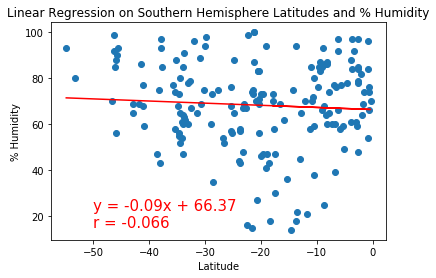

In [30]:
#Linear regress on south hemi humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Linear Regression on Southern Hemisphere Latitudes and % Humidity",
     "% Humidity", (-50, 15))

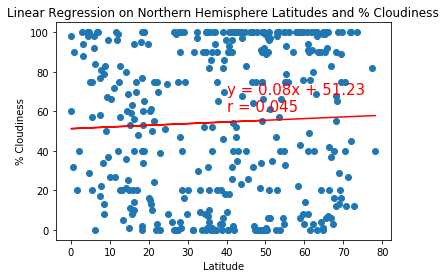

In [38]:
#Linear regress on north hemi cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Linear Regression on Northern Hemisphere Latitudes and % Cloudiness",
     "% Cloudiness", (40, 60))

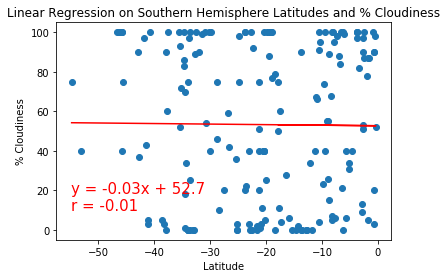

In [44]:
#Linear regress on south hemi cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Linear Regression on Southern Hemisphere Latitudes and % Cloudiness",
     "% Cloudiness", (-55, 10))

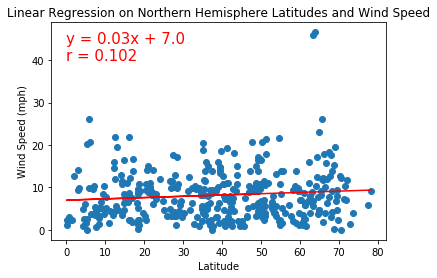

In [46]:
#Linear regress on north hemi wind speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression on Northern Hemisphere Latitudes and Wind Speed",
     "Wind Speed (mph)", (0, 40))

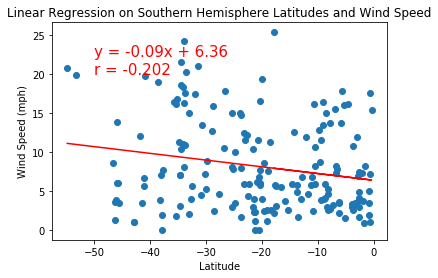

In [49]:
#Linear regress on south hemi wind speed
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression on Southern Hemisphere Latitudes and Wind Speed",
     "Wind Speed (mph)", (-50, 20))